# PPScore - Predictive Power Score

The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

In [2]:
import pandas as pd
import numpy as np
import ppscore as pps

df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

Based on the dataframe we can calculate the PPS of x predicting y:

In [3]:
pps.score(df, "x", "y")

{'x': 'x',
 'y': 'y',
 'ppscore': 0.6674774851483307,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.0131717369885038,
 'model_score': 0.33690241396005133,
 'model': DecisionTreeRegressor()}

We can calculate the PPS of all the predictors in the dataframe against a target y:

In [4]:
pps.predictors(df, "y")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,y,0.667477,regression,True,mean absolute error,1.013172,0.336902,DecisionTreeRegressor()
1,error,y,0.000000,regression,True,mean absolute error,1.013172,1.293165,DecisionTreeRegressor()


Here is how we can calculate the PPS matrix between all columns:

In [5]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.249625,0.336857,DecisionTreeRegressor()
2,x,y,0.667477,regression,True,mean absolute error,1.013172,0.336902,DecisionTreeRegressor()
3,error,x,0.000000,regression,True,mean absolute error,0.987712,1.322461,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.013172,1.293165,DecisionTreeRegressor()
6,y,x,0.000000,regression,True,mean absolute error,0.987712,1.043959,DecisionTreeRegressor()
7,y,error,0.000000,regression,True,mean absolute error,0.249625,0.280685,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


Plotting the PPS predictors:

In [ ]:
import seaborn as sns
predictors_df = pps.predictors(df, y="y")
sns.barplot(data=predictors_df, x="x", y="ppscore")

Plotting the PPS matrix:

<AxesSubplot:xlabel='x', ylabel='y'>

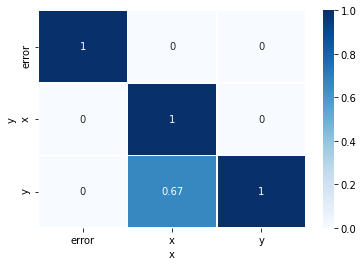

In [6]:
import seaborn as sns
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## Calculation of the PPS

There are multiple ways how you can calculate the PPS. The ppscore package provides a sample implementation that is based on the following calculations:

- The score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance.
- The score is calculated on the test sets of a 4-fold cross-validation (number is adjustable via cross_validation). For classification, stratifiedKFold is used. For regression, normal KFold. Please note that this sampling might not be valid for time series data sets.
- All rows which have a missing value in the feature or the target column are dropped.
- In case that the dataset has more than 5,000 rows the score is only calculated on a random subset of 5,000 rows. You can adjust the number of rows or skip this sampling via sample. However, in most scenarios the results will be very similar
- There is no grid search for optimal model parameters.
- The result might change between calculations because the calculation contains random elements, e.g. the sampling of the rows or the shuffling of the rows before cross-validation. If you want to make sure that your results are reproducible you can set the random seed (random_seed).
- If the score cannot be calculated, the package will not raise an error but return an object where is_valid_score is False. The reported score will be invalid_score. We chose this behavior because we want to give you a quick overview where significant predictive power exists without you having to handle errors or edge cases. However, when you want to explicitly handle the errors, you can still do so.